In [22]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

Index(['Theta1', 'Theta1_dot', 'Theta2', 'Theta2_dot'], dtype='object')


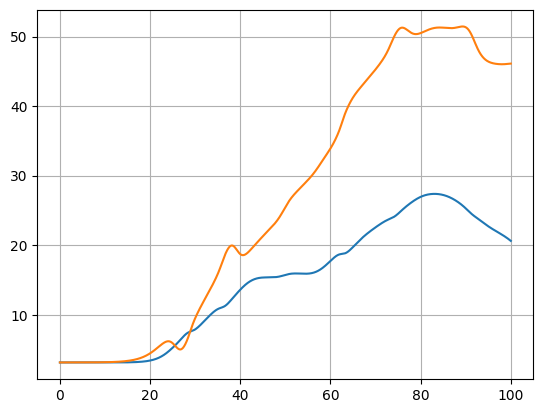

In [50]:
df = pd.read_csv('output.csv')
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
df.columns = df.columns.str.replace(r'\s+', '')  # Remove all whitespace


# Print column names to verify they are correct
print(df.columns)

# Access columns safely
theta1_list = df.get('Theta1', None)
theta1_dot_list = df.get('Theta1_dot', None)
theta2_list = df.get('Theta2', None)
theta2_dot_list = df.get('Theta2_dot', None)

# Check if the columns were found
# if theta1_list is None or theta1_dot_list is None or theta2_list is None or theta2_dot_list is None:
#     print("One or more columns were not found in the DataFrame.")
# else:
#     # Proceed with using the lists
#     print("Theta1 List:", theta1_list)
#     print("Theta1_dot List:", theta1_dot_list)
#     print("Theta2 List:", theta2_list)
#     print("Theta2_dot List:", theta2_dot_list)  
    
t = np.linspace(0,100, len(theta1_list))
t


plt.plot(t, theta1_list)
plt.plot(t, theta2_list)
plt.grid()
plt.show()

RuntimeError: x must be a sequence

Error in callback <function _draw_all_if_interactive at 0x0000022EFFBA1EE0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: x must be a sequence

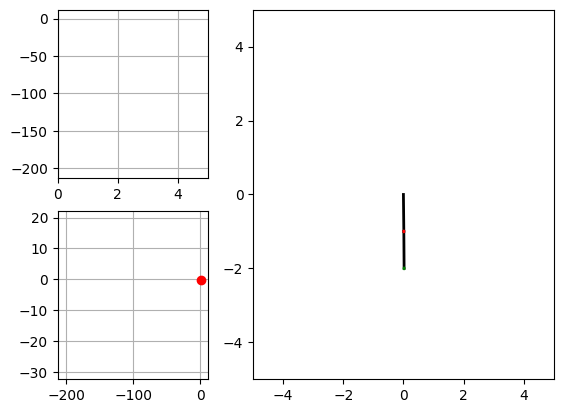

In [25]:

# Define pendulum properties
ell1 = 1.0  # Length of the first pendulum arm
ell2 = 1.0  # Length of the second pendulum arm
m1 = 1.0    # Mass of the first pendulum
m2 = 1.0    # Mass of the second pendulum

# Define initial conditions
theta1_0 = theta1_list[0]  # Initial angle for the first pendulum (from your data)
theta2_0 = theta2_list[0]  # Initial angle for the second pendulum (from your data)

# Define time array (assuming a consistent time step `dt`)
dt = 0.01  # Example time step
t = np.arange(0, len(theta1_list) * dt, dt)  # Adjust based on the length of your data



def pend_pos1(theta):
    theta1 = np.deg2rad(theta)
    return (ell1 * np.sin(theta1), -ell1 * np.cos(theta1))

def pend_pos2(theta1_deg, theta2_deg):
    theta1 = np.deg2rad(theta1_deg)
    theta2 = np.deg2rad(theta2_deg)
    return (ell1 * np.sin(theta1) + ell2 * np.sin(theta2), -ell1 * np.cos(theta1) - ell2 * np.cos(theta2))

pos1x = []
pos1y = []
pos2x = []
pos2y = []

for i in range(len(t)):
    pos1x.append(pend_pos1(theta1_list[i])[0])
    pos1y.append(pend_pos1(theta1_list[i])[1])
    pos2x.append(pend_pos2(theta1_list[i], theta2_list[i])[0])
    pos2y.append(pend_pos2(theta1_list[i], theta2_list[i])[1])

fig = plt.figure()
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[1, 1])

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[:, 1])

theta_curve, = ax0.plot(t[0], theta1_list[0], 'r')
theta_dot_curve, = ax0.plot(t[0], theta1_dot_list[0], 'b')

phase_curve, = ax1.plot(theta1_list[0], theta1_dot_list[0], 'b')
phase_dot, = ax1.plot(theta1_list[0], theta1_dot_list[0], 'ro')

x0, y0 = pend_pos1(theta1_0)
x0_2, y0_2 = pend_pos2(theta1_0, theta2_0)

line, = ax2.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax2.add_patch(plt.Circle(pend_pos1(theta1_0), m1 * 0.05, fc='r', zorder=3))
line2, = ax2.plot([x0, x0_2], [y0, y0_2], lw=2, c='k')
circle2 = ax2.add_patch(plt.Circle(pend_pos2(theta1_0, theta2_0), m2 * 0.05, fc='g', zorder=3))
dot_curve, = ax2.plot(pend_pos1(theta1_0)[0], pend_pos1(theta1_0)[1], lw=0.2, c='r', linestyle='dashed')
dot_curve2, = ax2.plot(pend_pos2(theta1_0, theta2_0)[0], pend_pos2(theta1_0, theta2_0)[1], lw=0.2, c='g', linestyle='dashed')

ax0.set_xlim(0, 5)
ax0.set_ylim(min(theta1_list) - 10, max(theta1_list) + 10)

ax1.set_xlim(min(theta1_list) - 10, max(theta1_list) + 10)
ax1.set_ylim(min(theta1_dot_list) - 10, max(theta1_dot_list) + 10)
ax1.grid()
ax0.grid()

ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)

def animate(i):
    theta_curve.set_data(t[:i+1], theta1_list[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta1_dot_list[:i+1])

    phase_curve.set_data(theta1_list[:i+1], theta1_dot_list[:i+1])
    phase_dot.set_data(theta1_list[i], theta1_dot_list[i])

    x, y = pend_pos1(theta1_list[i])
    x2, y2 = pend_pos2(theta1_list[i], theta2_list[i])
    line.set_data([0, x], [0, y])
    line2.set_data([x, x2], [y, y2])
    circle.set_center((x, y))
    circle2.set_center((x2, y2))
    dot_curve.set_data(pos1x[:i+1], pos1y[:i+1])
    dot_curve2.set_data(pos2x[:i+1], pos2y[:i+1])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('time_domain_double_pend.mp4', writer=ffmpeg_writer)

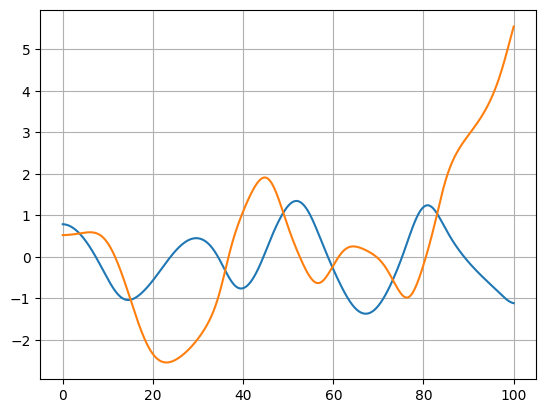

In [40]:
t = np.linspace(0,100, len(theta1_list))
t


plt.plot(t, theta1_list)
plt.plot(t, theta2_list)
plt.grid()
plt.show()